In [1]:
import sys
from pathlib import Path
import ProbabilisticParcellation.functional_profiles as fp
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as cm
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import ProbabilisticParcellation.functional_profiles as fp
import pandas as pd
import seaborn as sb
import ProbabilisticParcellation.scripts.atlas_paper.feature_model as fm
from ProbabilisticParcellation.scripts.atlas_paper.ridge_reg import ridgeFit
import numpy as np



# Import Dash dependencies
base_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
if not Path(base_dir).exists():
    base_dir = '/Users/callithrix/Documents/Projects/Functional_Fusion/'
if not Path(base_dir).exists():
    raise (NameError('Could not find base_dir'))
    

## Explore functional profiles in S1-S4 regions 

In [2]:
Data, regions = fm.load_profiles()
tags = fm.load_features()
tags_individ = fm.subject_features(tags, Data)
task_matrix, task_codes = fm.task_indicator(Data)
tags_task = np.concatenate(
    (tags_individ.T.to_numpy(), task_matrix), axis=1)

Data_norm, tags_norm = fm.normalize(Data[regions], tags_task)

# Ridge regression
R2, features = ridgeFit(Data_norm.to_numpy(), tags_norm,
                        fit_intercept=False, voxel_wise=False, alpha=1.0)


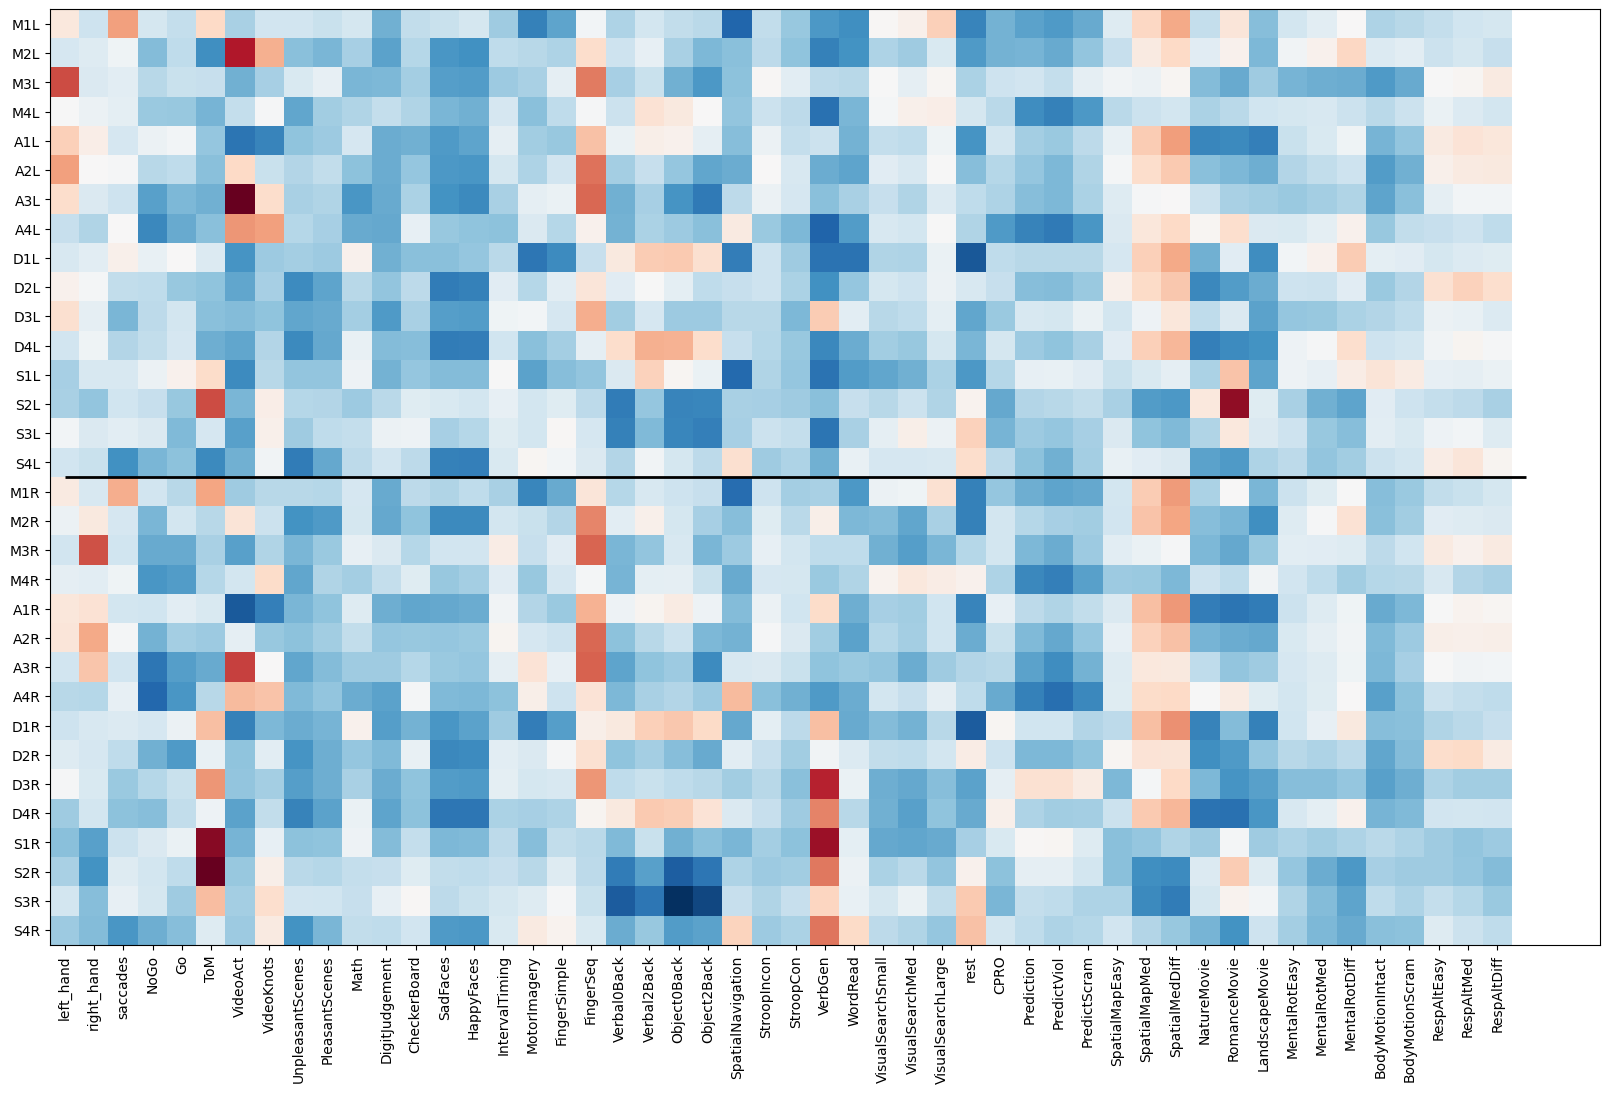

In [3]:
# Make dataframe
Features = pd.DataFrame(features.T, columns=[
    'left_hand', 'right_hand', 'saccades'] + list(task_codes.keys()), index=regions)

# Plot
cmap = plt.get_cmap('RdBu_r')
plt.figure(figsize=(20, 20))
plt.imshow(Features, cmap=cmap)
plt.yticks(np.arange(len(regions)), regions)
plt.xticks(np.arange(len(Features.columns.tolist())),
           Features.columns.tolist(), rotation=90)

# Plot a horizontal line in the middle
plt.hlines(len(regions) / 2 - 0.5, 0,
           len(Features.columns.tolist()), color='black', linewidth=2)


In [4]:
regions = ['A1L','A1R','A2L','A2R','A3L','A3R','A4L','A4R']
reg_colors = [[0.681,0.2444,0.2878],[1.0,0.4204,0.7005],[0.5,0.3261,1.0],[0.8166,0.1178,0.5079]]

([<matplotlib.axis.XTick at 0x7fcb98a5c4f0>,
 [Text(0, 0, 'left_hand'),
  Text(1, 0, 'right_hand'),
  Text(2, 0, 'saccades'),
  Text(3, 0, 'NoGo'),
  Text(4, 0, 'Go'),
  Text(5, 0, 'ToM'),
  Text(6, 0, 'VideoAct'),
  Text(7, 0, 'VideoKnots'),
  Text(8, 0, 'UnpleasantScenes'),
  Text(9, 0, 'PleasantScenes'),
  Text(10, 0, 'Math'),
  Text(11, 0, 'DigitJudgement'),
  Text(12, 0, 'CheckerBoard'),
  Text(13, 0, 'SadFaces'),
  Text(14, 0, 'HappyFaces'),
  Text(15, 0, 'IntervalTiming'),
  Text(16, 0, 'MotorImagery'),
  Text(17, 0, 'FingerSimple'),
  Text(18, 0, 'FingerSeq'),
  Text(19, 0, 'Verbal0Back'),
  Text(20, 0, 'Verbal2Back'),
  Text(21, 0, 'Object0Back'),
  Text(22, 0, 'Object2Back'),
  Text(23, 0, 'SpatialNavigation'),
  Text(24, 0, 'StroopIncon'),
  Text(25, 0, 'StroopCon'),
  Text(26, 0, 'VerbGen'),
  Text(27, 0, 'WordRead'),
  Text(28, 0, 'VisualSearchSmall'),
  Text(29, 0, 'VisualSearchMed'),
  Text(30, 0, 'VisualSearchLarge'),
  Text(31, 0, 'rest'),
  Text(32, 0, 'CPRO'),
  Text

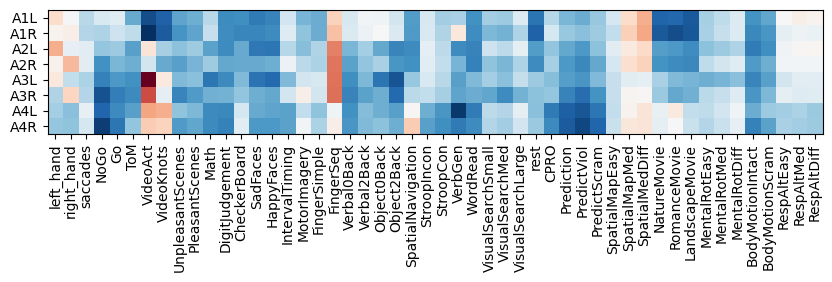

In [5]:
# Only select rows where the region is in the list
Feature_regions = Features.loc[regions]
cmap = plt.get_cmap('RdBu_r')
plt.figure(figsize=(10, 10))
plt.imshow(Features.loc[regions], cmap=cmap)
plt.yticks(np.arange(len(regions)), regions)
plt.xticks(np.arange(len(Features.columns.tolist())),
           Features.columns.tolist(), rotation=90)



In [6]:
# Melt
T = Feature_regions.reset_index().melt(id_vars='index', value_vars=Features.columns.tolist(),
                         var_name='task', value_name='score')

# make index into column
T['region'] = T['index']
# # Split region into side and region
T['side'] = T.region.str[-1]
T['reg'] = T.region.str[0:2]


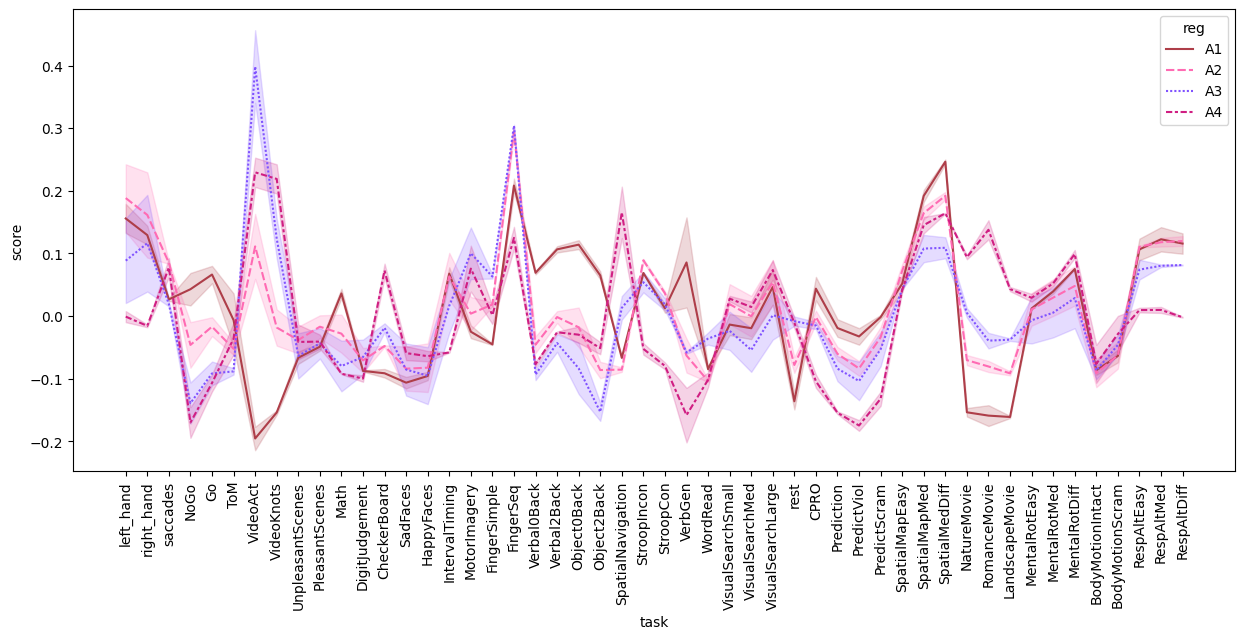

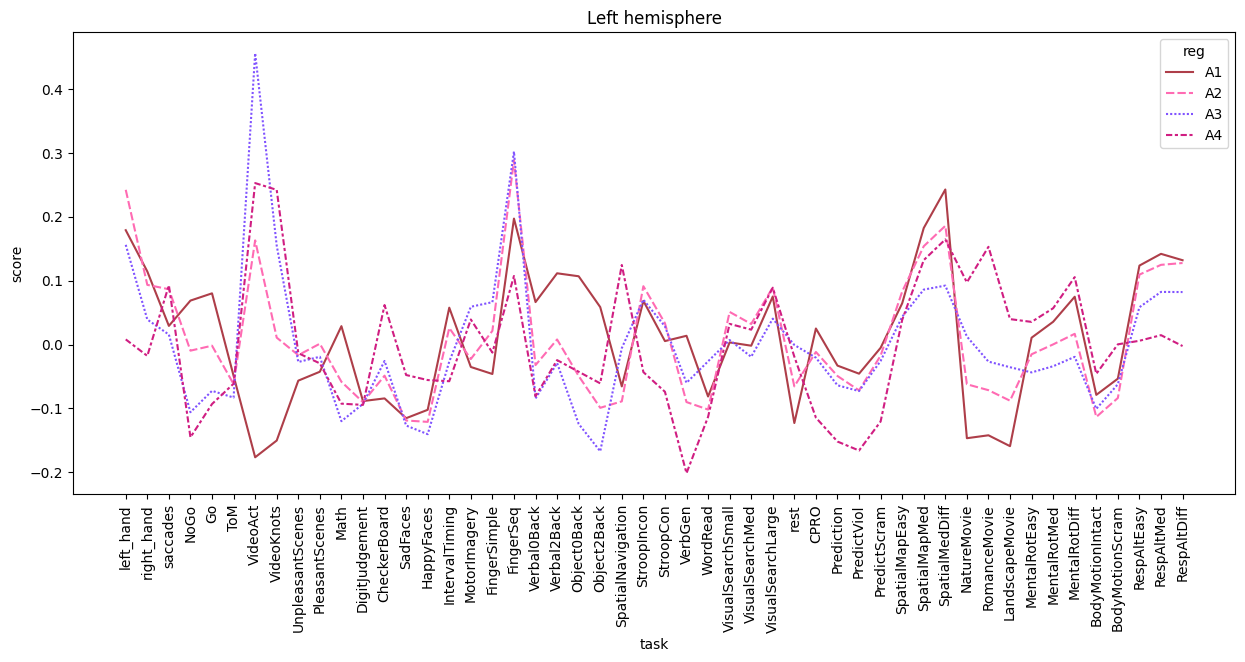

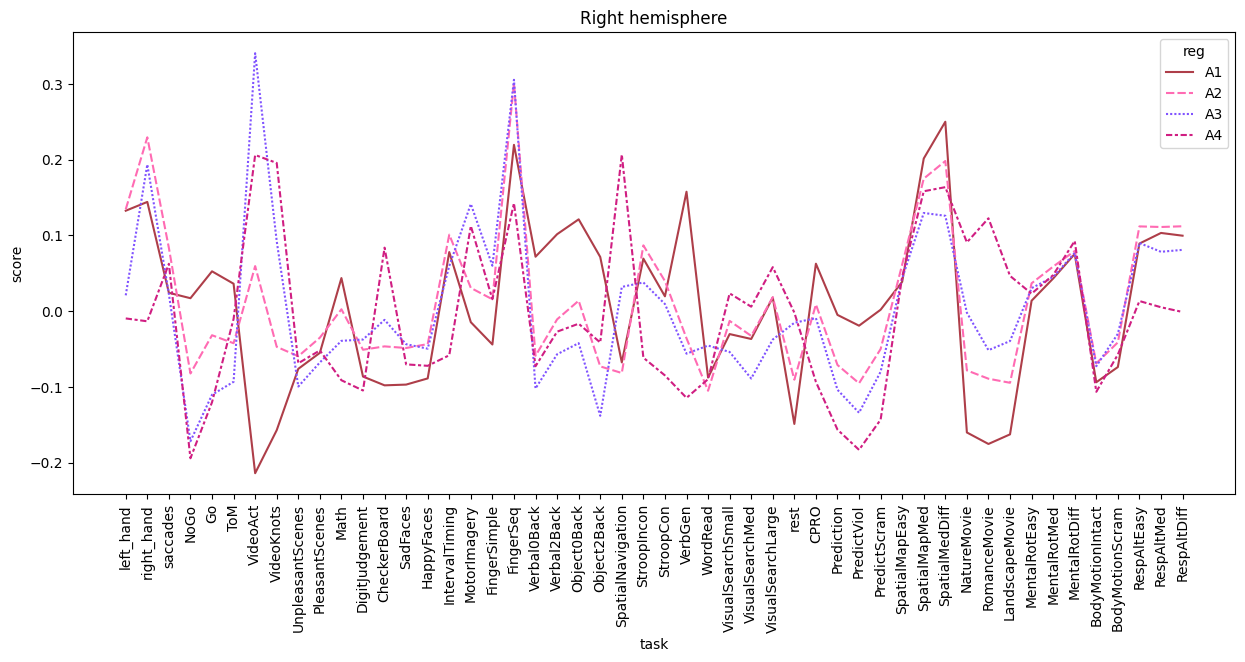

In [7]:
plt.figure(figsize=(15, 6))
sb.lineplot(data=T, x='task', y='score', hue='reg',
            palette=reg_colors, hue_order=['A1', 'A2', 'A3', 'A4'], style='reg')
xt = plt.xticks(rotation=90)

plt.figure(figsize=(15, 6))
sb.lineplot(data=T[T.side=='L'], x='task', y='score', hue='reg',
            palette=reg_colors, hue_order=['A1', 'A2', 'A3', 'A4'], style='reg')
plt.title('Left hemisphere')
xt = plt.xticks(rotation=90)

plt.figure(figsize=(15, 6))
sb.lineplot(data=T[T.side == 'R'], x='task', y='score', hue='reg',
            palette=reg_colors, hue_order=['A1', 'A2', 'A3', 'A4'], style='reg')
plt.title('Right hemisphere')
xt = plt.xticks(rotation=90)


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:120: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:121: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:120: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, nume

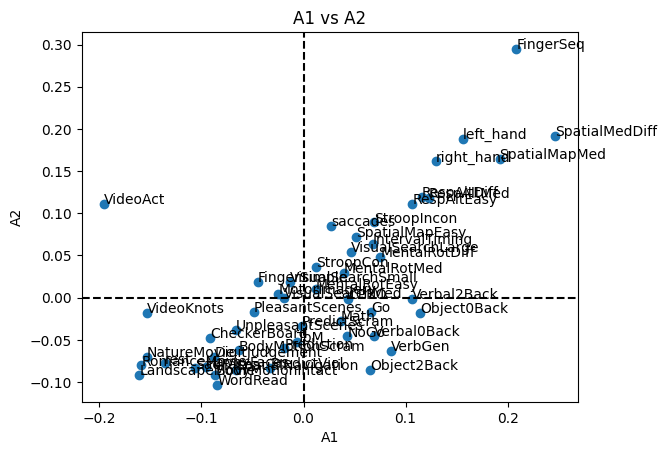

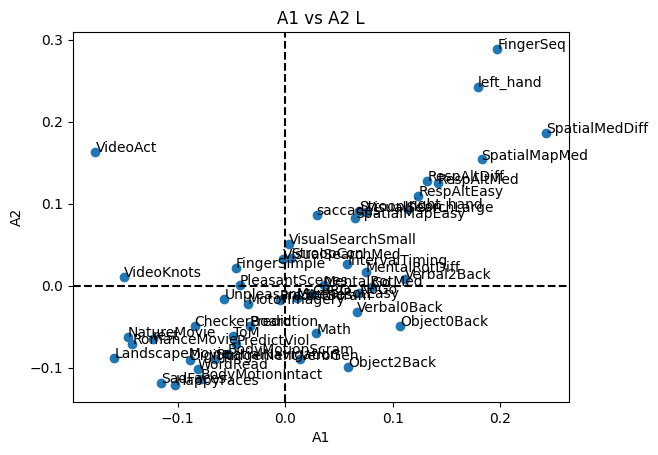

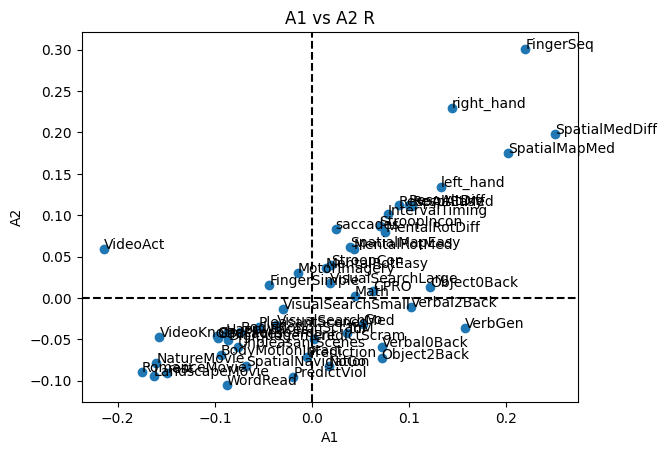

In [8]:
compare = ['A1', 'A2']
fm.scatter_plot(compare, T)
fm.scatter_plot(compare, T, side='L')
fm.scatter_plot(compare, T, side='R')

/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:120: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:121: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:120: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, nume

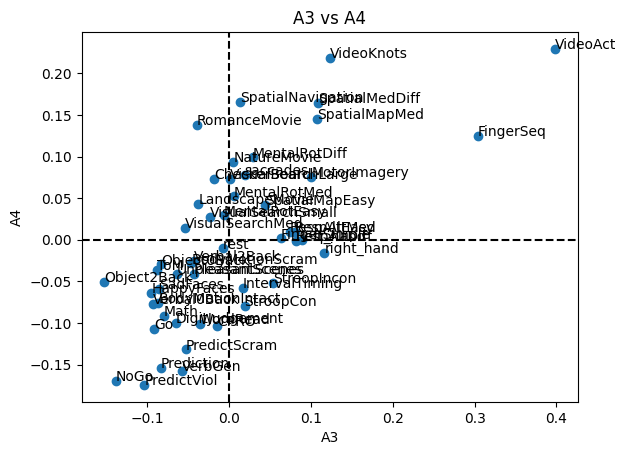

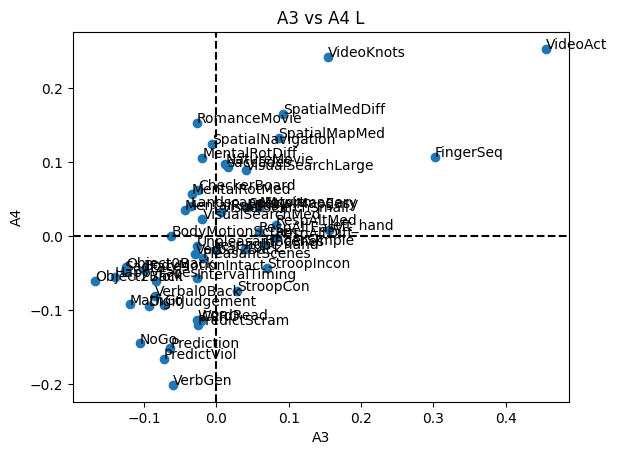

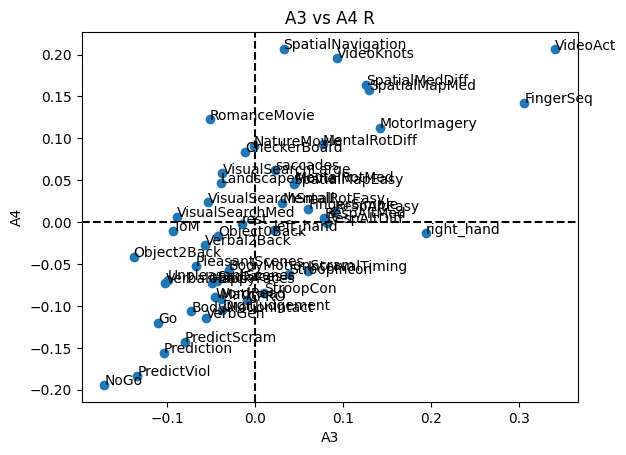

In [9]:
compare = ['A3', 'A4']
fm.scatter_plot(compare, T)
fm.scatter_plot(compare, T, side='L')
fm.scatter_plot(compare, T, side='R')


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:120: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:121: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:120: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, nume

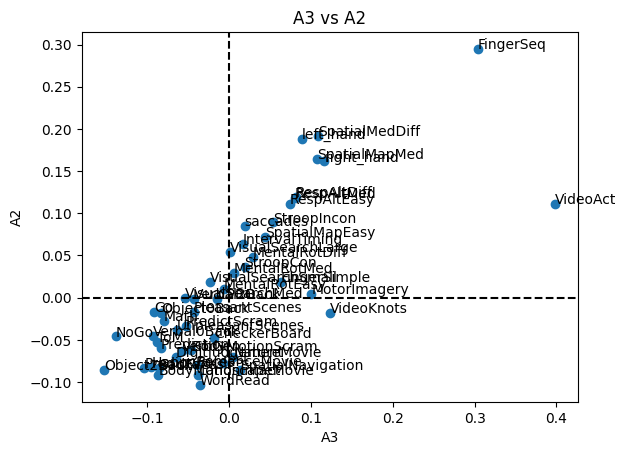

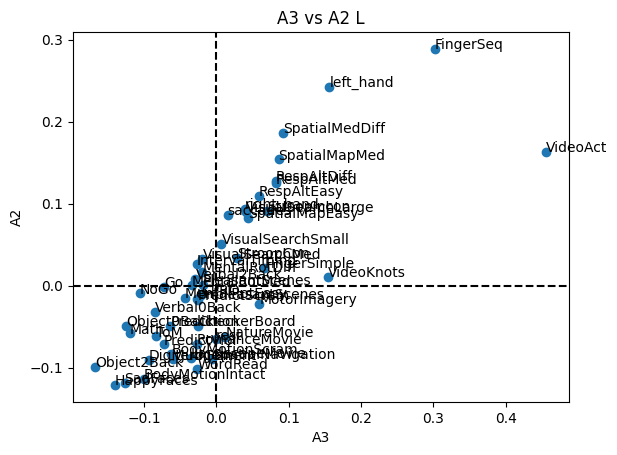

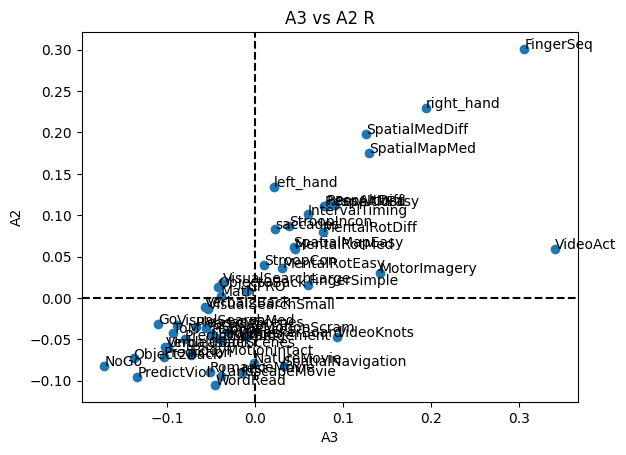

In [10]:
compare = ['A3', 'A2']
fm.scatter_plot(compare, T)
fm.scatter_plot(compare, T, side='L')
fm.scatter_plot(compare, T, side='R')


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:120: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:121: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:120: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, nume

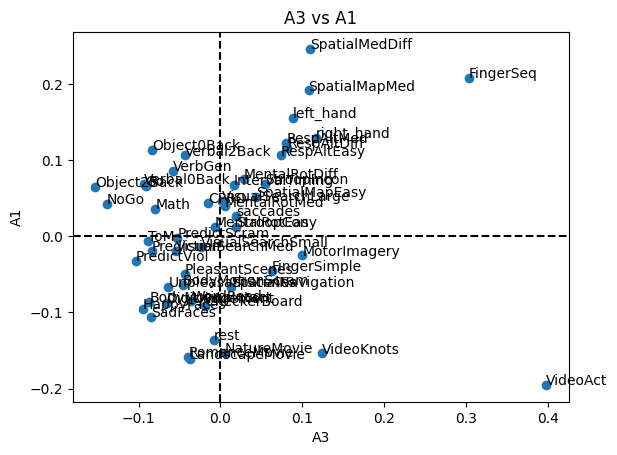

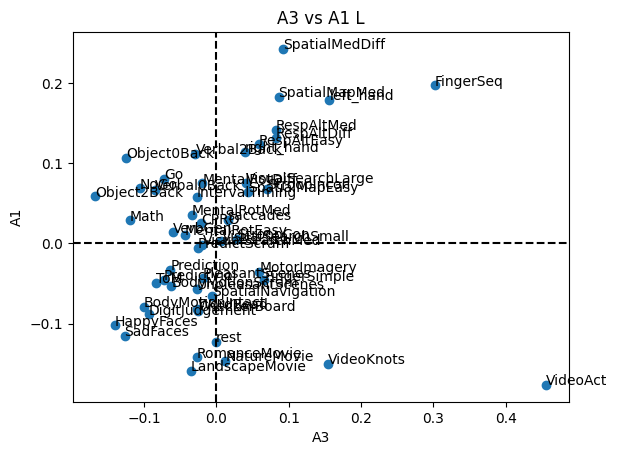

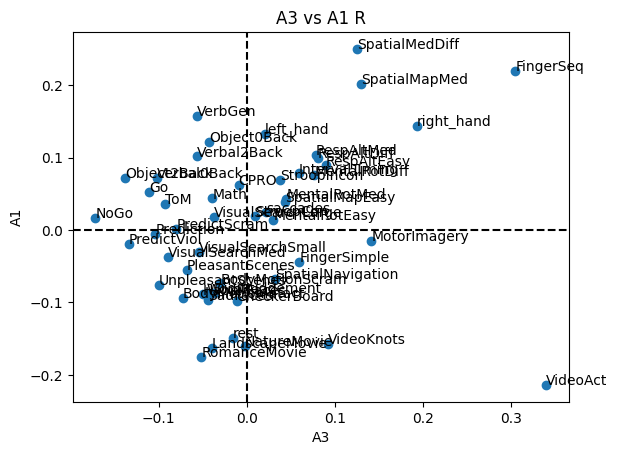

In [11]:
compare = ['A3', 'A1']
fm.scatter_plot(compare, T)
fm.scatter_plot(compare, T, side='L')
fm.scatter_plot(compare, T, side='R')


# Compare left and right hemisphere

/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:144: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region1 = data[data['reg'] == compare][data['side'] == 'L']
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:145: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region2 = data[data['reg'] == compare][data['side'] == 'R']
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:147: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:148: FutureWarning: The default value of 

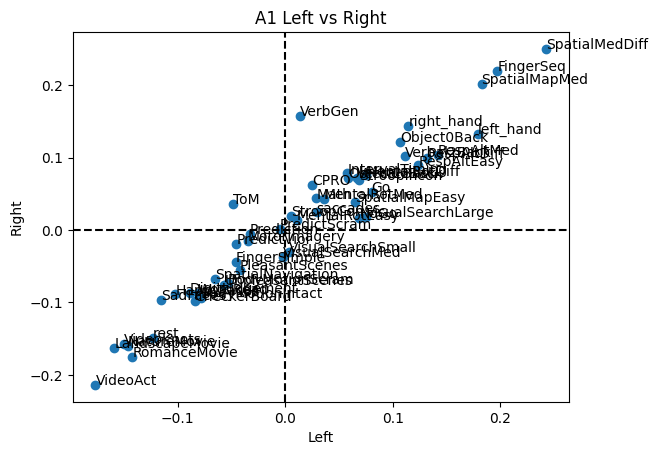

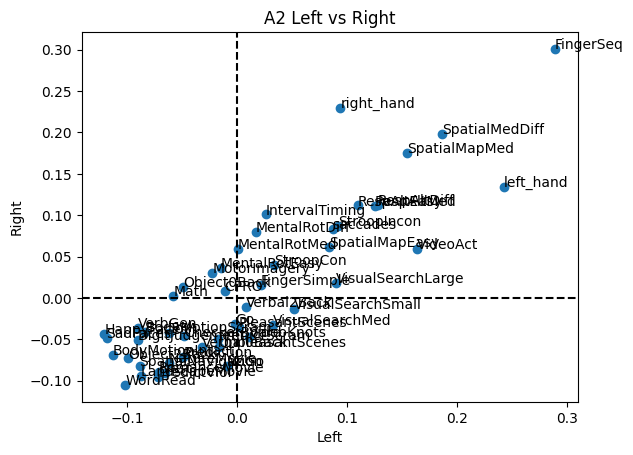

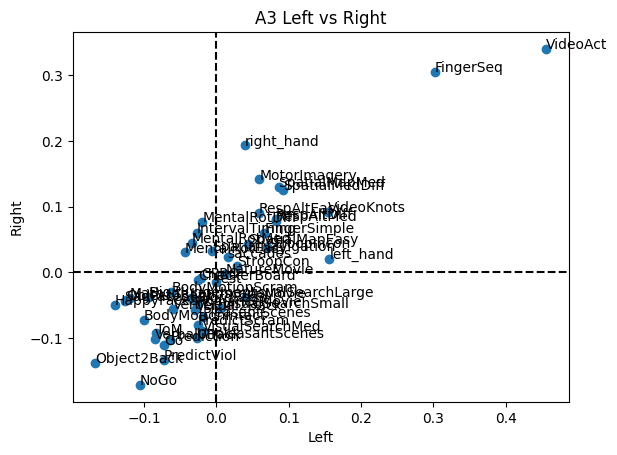

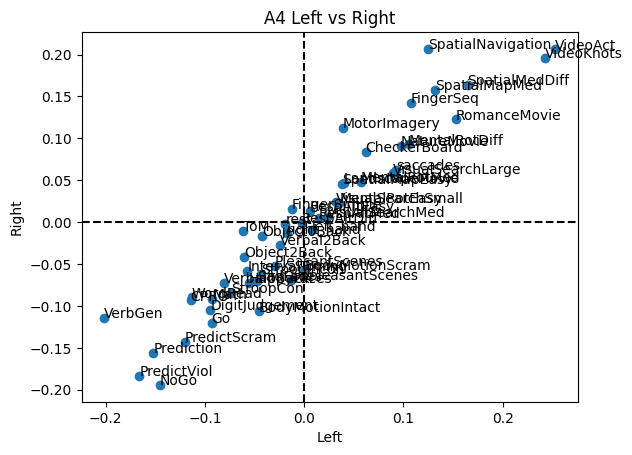

In [12]:
fm.scatter_plot_hemispheres('A1', T)
fm.scatter_plot_hemispheres('A2', T)
fm.scatter_plot_hemispheres('A3', T)
fm.scatter_plot_hemispheres('A4', T)
